In [1]:
import numpy as np
import pandas as pd
import os
import polars as pl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb

This data contains EEG correlates of genetic predisposition to alcoholism.

In [2]:
file_names_full = os.listdir('C:/Users/bbari/Documents/EEG Analysis/eeg_full')
file_names_a=[]
file_names_c=[]
for filename in file_names_full:
    if filename.startswith('co2a') or filename.startswith('co3a'):
        file_names_a.append(filename)
    else:
        file_names_c.append(filename)
print(f'This data set contains {len(file_names_a)} alcholic and {len(file_names_c)} control subjects.')

This data set contains 77 alcholic and 45 control subjects.


**Alcholic(a) Subjects**<br>
Extract and merge alcholic(a) subjects. Converting parquet format after that.

In [ ]:
file_names_list=[]
for file in file_names_a:
    file_names_temp=os.listdir('C:/Users/bbari/Documents/EEG Analysis/eeg_full/' + file)
    file_names_temp=[f for f in file_names_temp if not f.endswith('.gz')]
    file_names_list.append(file_names_temp)
file_names_list

In [ ]:
d2 = pl.DataFrame()
output_parquet_file = "C:/Users/bbari/Documents/EEG Analysis/finalize_a.parquet"
for a in range(0,len(file_names_a)):
    for i in range(0,len(file_names_list[a])):
        filename='C:/Users/bbari/Documents/EEG Analysis/eeg_full'+'/'+str(file_names_a[a])+ '/'+str(file_names_list[a][i])
        d1=pl.read_csv(filename,skip_rows=4,separator=" ",ignore_errors=True)
        d1=d1.with_columns(subject_group = pl.lit('a'),subject=pl.lit(str(file_names_a[a])))
        d2=pl.concat([d2,d1])
    print(filename)
d2=d2.rename({"#": "trial_num","FP1": "sensor_position","chan": "sample_num(timestamp)","0": "sensor_value(voltage(mV))"})
d2.write_parquet(output_parquet_file)

In [ ]:
df_a = pd.read_parquet('C:/Users/bbari/Documents/EEG Analysis/finalize_a.parquet') 
df_a

**Control(c) Subjects**<br>
Extract and merge control(c) subjects. Converting parquet format after that.

In [ ]:
file_names_list_2=[]
for file in file_names_c:
    file_names_temp=os.listdir('C:/Users/bbari/Documents/EEG Analysis/eeg_full/' + file)
    file_names_temp=[f for f in file_names_temp if not f.endswith('.gz')]
    file_names_list_2.append(file_names_temp)
file_names_list_2

In [ ]:
d4 = pl.DataFrame()
output_parquet_file = "C:/Users/bbari/Documents/EEG Analysis/finalize_c.parquet"
for a in range(0,len(file_names_c)):
    for i in range(0,len(file_names_list_2[a])):
        filename='C:/Users/bbari/Documents/EEG Analysis/eeg_full'+'/'+str(file_names_c[a])+ '/'+str(file_names_list_2[a][i])
        d3=pl.read_csv(filename,skip_rows=4,separator=" ",ignore_errors=True)
        d3=d3.with_columns(subject_group = pl.lit('c'),subject=pl.lit(str(file_names_c[a])))
        d4=pl.concat([d4,d3])
    print(filename)
d4=d4.rename({"#": "trial_num","FP1": "sensor_position","chan": "sample_num(timestamp)","0": "sensor_value(voltage(mV))"})
d4.write_parquet(output_parquet_file)

In [4]:
df_c = pd.read_parquet('C:/Users/bbari/Documents/EEG Analysis/finalize_c.parquet') 
df_c

,trial_num,sensor_position,sample_num(timestamp),sensor_value(voltage(mV)),subject_group,subject
0,0.0,FP1,0.0,3.082,c,co2c0000337
1,0.0,FP1,1.0,2.594,c,co2c0000337
2,0.0,FP1,2.0,2.106,c,co2c0000337
3,0.0,FP1,3.0,2.106,c,co2c0000337
4,0.0,FP1,4.0,3.571,c,co2c0000337
...,...,...,...,...,...,...
66182723,119.0,Y,251.0,-37.292,c,co3c0000402
66182724,119.0,Y,252.0,-36.316,c,co3c0000402
66182725,119.0,Y,253.0,-34.363,c,co3c0000402
66182726,119.0,Y,254.0,-33.386,c,co3c0000402


**Merge Two Subjects in One DataFrame**

In [5]:
df_merged=pd.concat([df_a,df_c])
df_merged

,trial_num,sensor_position,sample_num(timestamp),sensor_value(voltage(mV)),subject_group,subject
0,0.0,FP1,0.0,-8.921,a,co2a0000364
1,0.0,FP1,1.0,-8.433,a,co2a0000364
2,0.0,FP1,2.0,-2.574,a,co2a0000364
3,0.0,FP1,3.0,5.239,a,co2a0000364
4,0.0,FP1,4.0,11.587,a,co2a0000364
...,...,...,...,...,...,...
66182723,119.0,Y,251.0,-37.292,c,co3c0000402
66182724,119.0,Y,252.0,-36.316,c,co3c0000402
66182725,119.0,Y,253.0,-34.363,c,co3c0000402
66182726,119.0,Y,254.0,-33.386,c,co3c0000402


**Drop NaN Rows in DataFrame**

In [6]:
df_merged=df_merged.dropna(subset=['trial_num'])
df_merged

,trial_num,sensor_position,sample_num(timestamp),sensor_value(voltage(mV)),subject_group,subject
0,0.0,FP1,0.0,-8.921,a,co2a0000364
1,0.0,FP1,1.0,-8.433,a,co2a0000364
2,0.0,FP1,2.0,-2.574,a,co2a0000364
3,0.0,FP1,3.0,5.239,a,co2a0000364
4,0.0,FP1,4.0,11.587,a,co2a0000364
...,...,...,...,...,...,...
66182723,119.0,Y,251.0,-37.292,c,co3c0000402
66182724,119.0,Y,252.0,-36.316,c,co3c0000402
66182725,119.0,Y,253.0,-34.363,c,co3c0000402
66182726,119.0,Y,254.0,-33.386,c,co3c0000402


**Sort By Trial Number&Sample Number(Timestamp)**

In [7]:
df_merged=df_merged.sort_values(by=["trial_num","sample_num(timestamp)"])
df_merged #trial_num, sample_num(timestamp) to int 0,0 0,1 0,2...

,trial_num,sensor_position,sample_num(timestamp),sensor_value(voltage(mV)),subject_group,subject
0,0.0,FP1,0.0,-8.921,a,co2a0000364
257,0.0,FP2,0.0,0.834,a,co2a0000364
514,0.0,F7,0.0,-19.847,a,co2a0000364
771,0.0,F8,0.0,8.148,a,co2a0000364
1028,0.0,AF1,0.0,-2.146,a,co2a0000364
...,...,...,...,...,...,...
66181699,119.0,P2,255.0,-10.935,c,co3c0000402
66181956,119.0,P1,255.0,-12.146,c,co3c0000402
66182213,119.0,CPZ,255.0,-4.232,c,co3c0000402
66182470,119.0,nd,255.0,-32.939,c,co3c0000402


**Reshape Sensor Values(voltage(mV) in Numpy Array**

In [4]:
#df_merged.to_parquet('C:/Users/bbari/Documents/EEG Analysis/df_merged.parquet.gzip',compression='gzip',index=False)

In [2]:
#code starts here...
df_merged = pd.read_parquet('C:/Users/bbari/Documents/EEG Analysis/df_merged.parquet.gzip')
df_merged

,trial_num,sensor_position,sample_num(timestamp),sensor_value(voltage(mV)),subject_group,subject
0,0.0,FP1,0.0,-8.921,a,co2a0000364
1,0.0,FP2,0.0,0.834,a,co2a0000364
2,0.0,F7,0.0,-19.847,a,co2a0000364
3,0.0,F8,0.0,8.148,a,co2a0000364
4,0.0,AF1,0.0,-2.146,a,co2a0000364
...,...,...,...,...,...,...
181157883,119.0,P2,255.0,-10.935,c,co3c0000402
181157884,119.0,P1,255.0,-12.146,c,co3c0000402
181157885,119.0,CPZ,255.0,-4.232,c,co3c0000402
181157886,119.0,nd,255.0,-32.939,c,co3c0000402


In [23]:
#aa=df_merged["sensor_value(voltage(mV))"].to_numpy()
#aa=aa.reshape((aa.shape[0]//64,64))
#df=pd.DataFrame(aa,columns=sorted(df_merged["sensor_position"].unique()))

In [3]:
df_pivot = df_merged.pivot_table(index=['trial_num', 'sample_num(timestamp)', 'subject_group', 'subject'],
                          columns='sensor_position',
                          values='sensor_value(voltage(mV))',
                          aggfunc='first').reset_index()
df_pivot

sensor_position,trial_num,sample_num(timestamp),subject_group,subject,AF1,AF2,AF7,AF8,AFZ,C1,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
0,0.0,0.0,a,co2a0000364,-2.146,1.129,-16.856,-10.020,-0.987,-1.129,...,5.157,-6.266,-2.797,-6.805,-3.886,-9.338,-3.082,-5.269,-5.636,-8.901
1,0.0,0.0,a,co2a0000368,4.079,2.340,-0.061,4.242,2.391,0.203,...,2.625,-0.753,-0.203,1.770,-0.234,0.285,0.285,0.285,1.536,0.000
2,0.0,0.0,a,co2a0000369,1.617,2.055,1.831,1.485,2.879,0.753,...,4.008,-1.058,-0.651,1.912,5.493,-2.747,6.134,0.458,3.805,-2.350
3,0.0,0.0,a,co2a0000370,-0.183,-0.498,0.702,-1.119,0.468,-0.031,...,5.219,4.272,2.655,2.930,0.946,3.560,1.923,8.250,7.548,3.764
4,0.0,0.0,a,co2a0000371,-0.071,-0.682,-0.610,4.924,-1.241,1.058,...,2.726,0.244,0.997,-4.415,-0.682,-1.780,3.621,2.106,0.173,-1.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830587,119.0,255.0,c,co2c0000394,25.289,25.126,30.141,36.346,25.421,0.722,...,31.291,3.652,4.517,11.556,37.567,3.448,32.308,37.120,21.983,22.786
2830588,119.0,255.0,c,co2c0000395,10.335,4.395,19.613,9.715,6.887,4.700,...,3.601,0.295,2.401,19.501,10.122,15.411,10.803,21.444,31.311,29.785
2830589,119.0,255.0,c,co2c0000397,9.481,9.684,20.162,3.255,5.819,-2.126,...,-23.102,-18.921,-21.576,-12.950,-6.582,-14.537,-3.428,4.781,-2.218,-1.648
2830590,119.0,255.0,c,co2c1000367,8.382,8.911,17.629,15.767,7.243,3.967,...,-24.261,-7.243,-6.978,18.575,3.143,17.161,-7.833,19.826,6.836,-9.003


**Applying PCA Into Dataset**

In [4]:
X = df_pivot.iloc[:,4:].values #features(voltages)
y = df_pivot.iloc[:,:4] #classes/labels(trial_num, sample_num, subject_group, subject)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(2)])
pca_df

,PC1,PC2
0,-1.033074,0.581490
1,1.750181,0.668800
2,2.051101,0.549276
3,2.534624,-0.711217
4,0.466673,-0.190709
...,...,...
2830587,12.484447,5.982391
2830588,7.496452,2.013609
2830589,-5.255408,9.459780
2830590,3.554804,4.867302


In [5]:
pca.explained_variance_ratio_.cumsum()

array([0.37198099, 0.61274865])

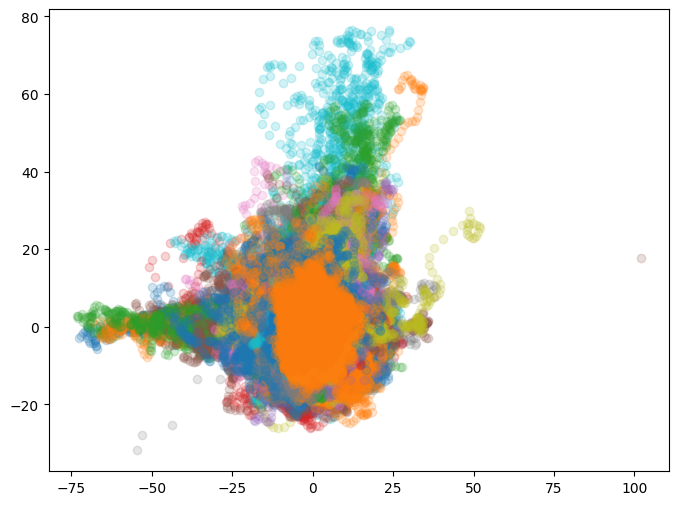

In [8]:
my_df = pd.concat([df_pivot.iloc[:,:4], pca_df], axis=1) #merging df_pivot labels with pca results
plt.figure(figsize=(8, 6))
for group in df_pivot['subject'].unique():
    subset = my_df[my_df['subject'] == group]
    plt.scatter(subset['PC1'], subset['PC2'],  label=group, alpha=0.2)
plt.show()

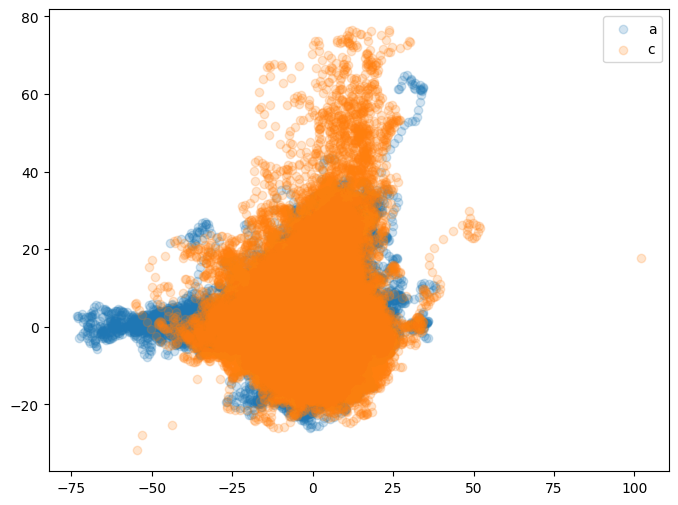

In [8]:
plt.figure(figsize=(8, 6))
for group in df_pivot['subject_group'].unique():
    subset = my_df[my_df['subject_group'] == group]
    plt.scatter(subset['PC1'], subset['PC2'],  label=group, alpha=0.2)
plt.legend()
plt.show()

**Classification Algorithms**

##### 1) AdaBoost

In [11]:
y = df_pivot['subject']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=20, random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}") #approximate runtime=15 mins

C:\Users\bbari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.0392


##### 2) LightGBM

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lgb_model = lgb.LGBMClassifier(n_estimators=50, n_jobs=-1, random_state=42, verbose=-1)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}") #approximate runtime=15 mins

Accuracy: 0.5468


##### 3) XGBoost

In [16]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_pivot['subject'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(max_depth=3, n_estimators=50, n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}') #approximate runtime=10 mins

Accuracy score: 0.29


##### 4) Gradient Boost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")